In [1]:
# !pip install text2emotion

In [2]:
# import text2emotion as te


In [3]:
# !pip install pandas matplotlib tensorflow


In [2]:
import numpy as np 
import pandas as pd 
import os

In [3]:
df = pd.read_csv(r"C:\Users\h.d\Downloads/text_emotion.csv")
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [4]:
import nltk
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams

In [5]:
nltk.download('words')
from nltk.corpus import words
  
correct_words = words.words()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\h.d\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
def spelling_fix(text):
    new_text = []
    incorrect_words = nltk.word_tokenize(text)
    for word in incorrect_words:
        temp = [(jaccard_distance(set(ngrams(word, 2)),
                                  set(ngrams(w, 2))),w)
                for w in correct_words if w[0]==word[0]]
        most_similar_list = sorted(temp, key = lambda val:val[0])
        
        if len(most_similar_list) == 0:
            new_text.append(word)
            continue
            
        if most_similar_list[0][0] >= 0.9:
            new_text.append(most_similar_list[0][1])
        else:
            new_text.append(word)
    return " ".join(new_text)

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [9]:
def remove_emoji(text):
    regex_pattern = re.compile("["                               
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U0001F1E6-\U0001F1FF"  # flags                              
                               "]+", flags=re.UNICODE)

    return regex_pattern.sub(r'', text)



In [10]:
def remove_email(text):
    return re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', '', text)

In [11]:
def remove_repeated_char(text):
    return re.sub(r'(.)\1\1{1,}', r'\1\1', text)

In [12]:
def remove_account_tag(text):
    return re.sub(r'@[\w]+', '', text)

In [13]:
def remove_hashtag(text):
    return re.sub(r'#[\w]+', '', text)

In [14]:
def remove_links(text):
    return re.sub(r'http[^\s]+', '', text)

In [15]:
def remove_spaces(text):
    text = re.sub(r"\d+", ' ', text)
    text = re.sub(r"\n+", ' ', text)
    text = re.sub(r"\t+", ' ', text)
    text = re.sub(r"\r+", ' ', text)
    text = re.sub(r"\s+", ' ', text)
    return text

In [16]:
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    return " ".join([w for w in word_tokens if not w in stop_words])

In [17]:
def remove_less_2_characters(text):
    return re.sub(r"\W*\b\w{1,2}\b", '', text)

In [18]:
def lemmatize(text):
    new_text = []
    tokenization = nltk.word_tokenize(text)
    for w in tokenization:
        tmp_w = wordnet_lemmatizer.lemmatize(w)
        if tmp_w is None:
            new_text.append(w)
        else:
            new_text.append(tmp_w)
    return " ".join(new_text)

In [19]:
def preprocess_text_sample(text):
    text = remove_emoji(text)
    text = remove_email(text)
    text = remove_repeated_char(text)
    text = remove_account_tag(text)
    text = remove_hashtag(text)
    text = remove_links(text)
    text = remove_stop_words(text)
    text = remove_spaces(text)
    text = remove_less_2_characters(text)
    text = text.strip()
    text = text.lower()
    #text = spelling_fix(text)
    text = lemmatize(text)
    return text

In [20]:
def preprocess_text_cols(df, col):
    df[col] = df[col].apply(lambda x: preprocess_text_sample(x))
    return df

In [21]:
def preprocess_df(df, col="content"):
    df = preprocess_text_cols(df, col)
    df.dropna(inplace=True)
    return df


In [22]:
df = preprocess_df(df, "content")
df = df[df["content"] != ""]
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,know listenin bad habit earlier started freaki...
1,1956967666,sadness,wannamama,layin bed headache ughh .. waitin call ..
2,1956967696,sadness,coolfunky,funeral ceremony .. gloomy friday ..
3,1956967789,enthusiasm,czareaquino,want hang friend soon !
4,1956968416,neutral,xkilljoyx,"want trade someone houston ticket , one ."
...,...,...,...,...
39994,1753918900,happiness,courtside101,succesfully following tayla ! !
39996,1753919001,love,drapeaux,happy mother day all love
39997,1753919005,love,JenniRox,"happy mother day mommy , woman man long 'momma..."
39998,1753919043,happiness,ipdaman1,wassup beautiful ! ! follow ! ! peep out new h...


In [23]:
df["sentiment"].value_counts()

neutral       8531
worry         8444
happiness     5205
sadness       5158
love          3839
surprise      2183
fun           1776
relief        1525
hate          1322
empty          810
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

C:\Users\h.d\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

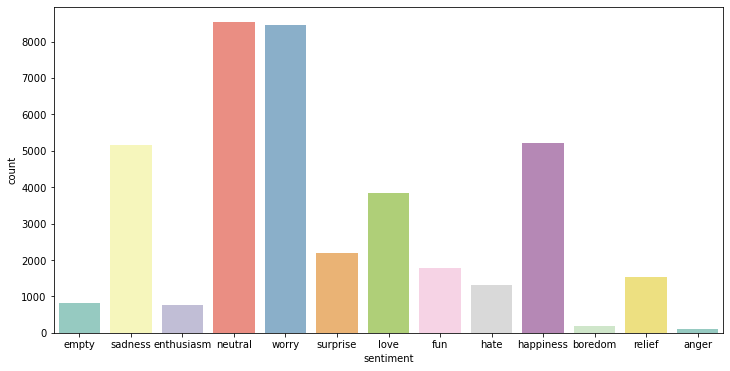

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,6))
sns.countplot(df["sentiment"], palette='Set3')

In [25]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [26]:
def get_label_encoder_obj(y):
    label_encoder = LabelEncoder()
    return label_encoder.fit(y)


In [27]:
def get_y_label_encoder(label_encoder, y):
    return label_encoder.transform(y)

In [28]:
def get_label_decoder(label_encoder, y):
    return label_encoder.classes_[y]

In [29]:
def one_hot_encode(y, num_classes):
    return to_categorical(y, num_classes=num_classes)

In [30]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.1, random_state=2, stratify=df["sentiment"])

In [31]:
label_encoder = get_label_encoder_obj(train["sentiment"])
train["sentiment"] = get_y_label_encoder(label_encoder, train["sentiment"])
val["sentiment"] = get_y_label_encoder(label_encoder, val["sentiment"])

C:\Users\h.d\AppData\Local\Temp/ipykernel_6852/4108910125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["sentiment"] = get_y_label_encoder(label_encoder, train["sentiment"])
C:\Users\h.d\AppData\Local\Temp/ipykernel_6852/4108910125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["sentiment"] = get_y_label_encoder(label_encoder, val["sentiment"])


In [32]:
num_classes = len(np.unique(train["sentiment"]))
num_classes

13

In [33]:
X_train = train["content"].values
y_train = train["sentiment"].values
X_val = val["content"].values
y_val = val["sentiment"].values

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

def CountVectorizer_fit(X_train, ngram_range=(1,1)):
    count_vect = CountVectorizer(ngram_range=ngram_range)
    return count_vect.fit(X_train)


In [35]:
def CountVectorizer_transform(count_vect, X):
    return count_vect.transform(X)

In [36]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [73]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (20,20))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))


In [75]:
count_vect = CountVectorizer_fit(X_train, ngram_range=(1,3))
X_train_counts = CountVectorizer_transform(count_vect, X_train)
X_val_counts = CountVectorizer_transform(count_vect, X_val)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [72]:
from sklearn.feature_extraction.text import TfidfTransformer


def TfidfTransformer_fit(X_train_counts, use_idf=True):
    tf_transformer = TfidfTransformer(use_idf=use_idf)
    return tf_transformer.fit(X_train_counts)


def TfidfTransformer_transform(tf_transformer, X_counts):
    return tf_transformer.transform(X_counts)

In [40]:
tf_transformer = TfidfTransformer_fit(X_train_counts)
X_train_tfidf = TfidfTransformer_transform(tf_transformer, X_train_counts)
X_val_tfidf = TfidfTransformer_transform(tf_transformer, X_val_counts)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

%time
grid_params = { "loss": ["hinge", "log", "modified_huber"],
               "penalty": ["l1", "l2", "elasticnet"],
               "alpha": [1e-5],
               "max_iter":[15]
    
}

grid = GridSearchCV(SGDClassifier(), grid_params, refit=True, cv=3, verbose=1)
grid.fit(X_train_tfidf, y_train)

Wall time: 0 ns
Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\h.d\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence.

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-05],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'max_iter': [15],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [42]:
print(grid.best_params_)
print(grid.best_estimator_)

{'alpha': 1e-05, 'loss': 'log', 'max_iter': 15, 'penalty': 'l1'}
SGDClassifier(alpha=1e-05, loss='log', max_iter=15, penalty='l1')


Accuracy:  0.4758478357875948
Precision::  0.4758478357875948
Recall::  0.4758478357875948
F1_Score::  0.47584783578759476

Macro precision_recall_fscore_support (macro) average
(0.5914073168929478, 0.2652645282748054, 0.2906454501129561, None)

Macro precision_recall_fscore_support (micro) average
(0.4758478357875948, 0.4758478357875948, 0.47584783578759476, None)

Macro precision_recall_fscore_support (weighted) average
(0.5424977482619852, 0.4758478357875948, 0.4449328299152128, None)

Confusion Matrix


C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        99
     boredom       0.50      0.01      0.02       161
       empty       0.91      0.10      0.18       729
  enthusiasm       0.97      0.05      0.10       683
         fun       0.70      0.11      0.19      1598
   happiness       0.51      0.47      0.49      4684
        hate       0.58      0.21      0.31      1190
        love       0.60      0.50      0.54      3455
     neutral       0.41      0.74      0.53      7678
      relief       0.70      0.13      0.22      1373
     sadness       0.58      0.39      0.46      4642
    surprise       0.77      0.13      0.22      1965
       worry       0.46      0.62      0.53      7599

    accuracy                           0.48     35856
   macro avg       0.59      0.27      0.29     35856
weighted avg       0.54      0.48      0.44     35856



C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


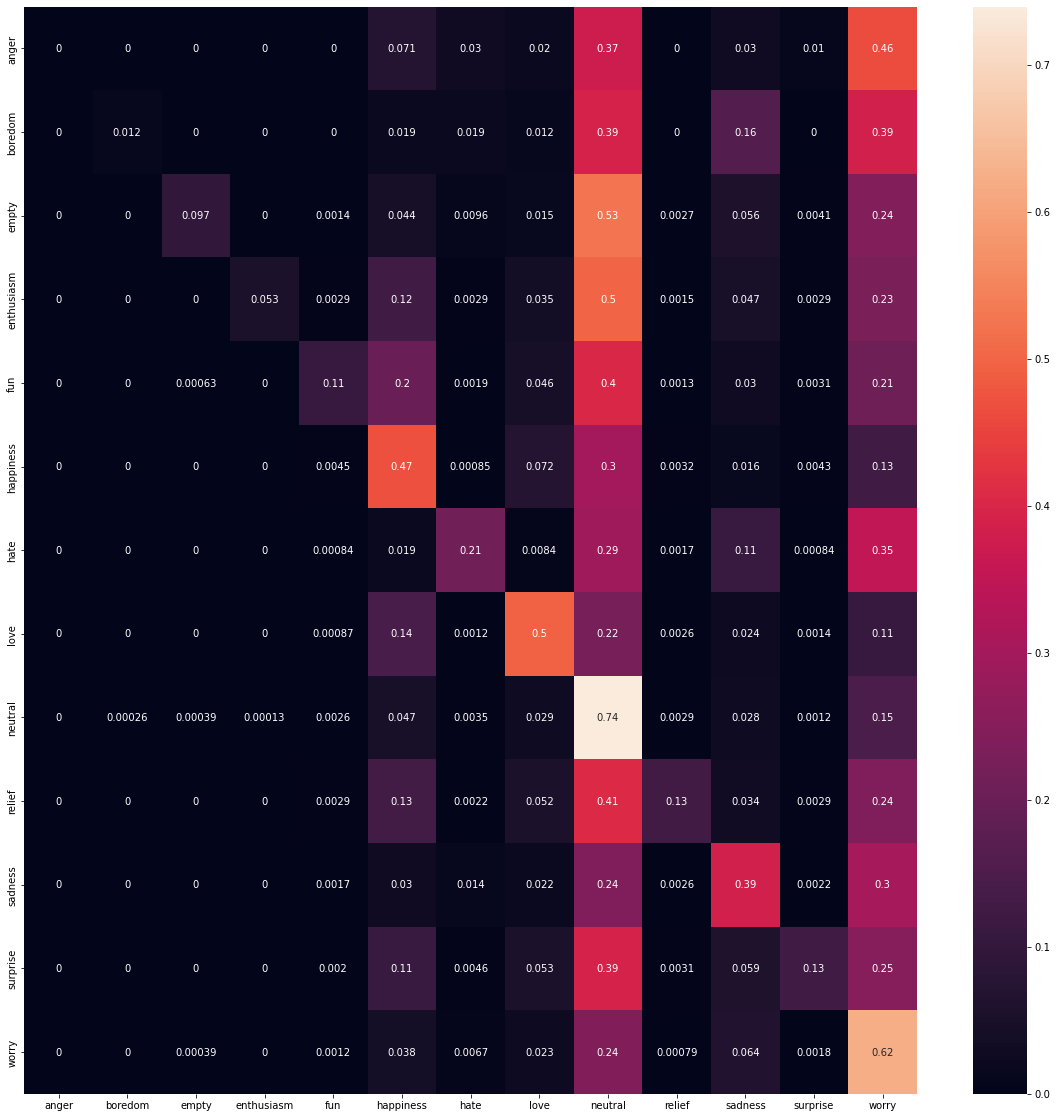

In [43]:
y_hat = grid.best_estimator_.predict(X_train_tfidf)
y_train_ohe = one_hot_encode(y_train, num_classes)
y_hat_ohe = one_hot_encode(y_hat, num_classes)
print_score(y_hat, y_train, label_encoder)

Accuracy:  0.33726474278544544
Precision::  0.33726474278544544
Recall::  0.33726474278544544
F1_Score::  0.33726474278544544

Macro precision_recall_fscore_support (macro) average
(0.20342194376165737, 0.1873780607938622, 0.18567097025840906, None)

Macro precision_recall_fscore_support (micro) average
(0.33726474278544544, 0.33726474278544544, 0.33726474278544544, None)

Macro precision_recall_fscore_support (weighted) average
(0.30796994402921296, 0.33726474278544544, 0.3144461929336906, None)

Confusion Matrix


C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        11
     boredom       0.00      0.00      0.00        18
       empty       0.00      0.00      0.00        81
  enthusiasm       0.00      0.00      0.00        76
         fun       0.13      0.04      0.06       178
   happiness       0.32      0.40      0.35       521
        hate       0.36      0.21      0.27       132
        love       0.45      0.48      0.47       384
     neutral       0.34      0.41      0.37       853
      relief       0.13      0.06      0.08       152
     sadness       0.32      0.32      0.32       516
    surprise       0.25      0.07      0.11       218
       worry       0.33      0.45      0.38       845

    accuracy                           0.34      3985
   macro avg       0.20      0.19      0.19      3985
weighted avg       0.31      0.34      0.31      3985



C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


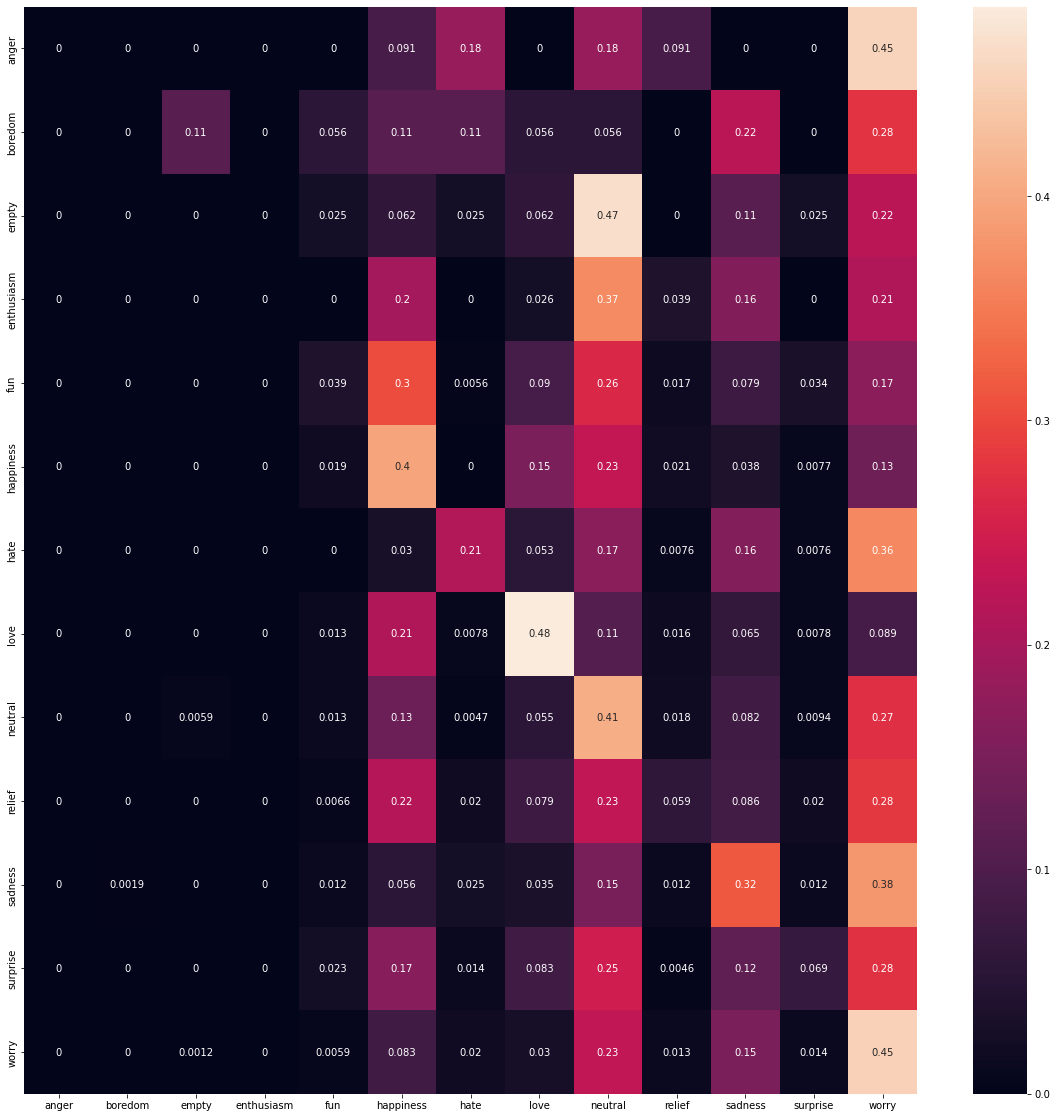

In [44]:
y_hat = grid.best_estimator_.predict(X_val_tfidf)
y_val_ohe = one_hot_encode(y_val, num_classes)
y_hat_ohe = one_hot_encode(y_hat, num_classes)
print_score(y_hat, y_val, label_encoder)

In [45]:
SEQ_LEN = max([len(x.split()) for x in train["content"].values])
SEQ_LEN

46

In [46]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
import nltk

nltk.download('punkt')
nltk.download('wordnet')

oov_tok = "<oov_tok>"

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\h.d\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\h.d\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
def count_vectorizer(corpus):
    vectorizer = CountVectorizer(analyzer='word')
    corpus_words = vectorizer.fit_transform(corpus)
    return len(vectorizer.vocabulary_)

In [48]:
def get_tokenizer_obj(text_list, num_words):
    tokenizer = Tokenizer(lower=True, split=" ", num_words=num_words, oov_token=oov_tok)
    tokenizer.fit_on_texts(text_list)
    return tokenizer, len(tokenizer.word_index)

In [49]:
def tokenize_texts_to_sequences(tokenizer, text_list):
     return tokenizer.texts_to_sequences(text_list)

In [50]:
def padding_sequences(x_arr, max_len):
    x_arr = pad_sequences(x_arr, maxlen=max_len, value=0, padding='post')
    return x_arr

In [51]:
def get_num_words(df, col):
    return count_vectorizer(df[col])

In [52]:
def get_max_statment_len(df, col):
    return max([len(text.split()) for text in df[col]])

In [53]:
col = "content"
num_words = get_num_words(train, col)
max_statment_len = get_max_statment_len(train, col)
tokenizer, vocab_size = get_tokenizer_obj(train[col].values, num_words)
X_train = tokenize_texts_to_sequences(tokenizer, train[col].values)
X_train = padding_sequences(X_train, max_statment_len)

In [54]:
X_val = tokenize_texts_to_sequences(tokenizer, val[col].values)
X_val = padding_sequences(X_val, max_statment_len)

In [55]:
from sklearn.utils import class_weight

def get_class_weights(y):
    class_weights = class_weight.compute_class_weight('balanced',
                                                      classes=np.unique(y),
                                                      y=y)
    return {k: v for k, v in enumerate(class_weights)}

In [56]:
train[['content', 'sentiment']]

,content,sentiment
29212,thanks,8
21181,nice big bed .. ipod play .. soft music flowin...,7
27431,hey girl sent message myspace,5
33728,make prank call,4
15896,noo way dude mean net country,11
...,...,...
24732,changing online nickname mtaby ( hopefully uni...,8
28865,shit thanks much twitter lovee . appreciate ev...,7
16435,ticked cause see & quot ; drag hell & quot ; m...,10
6002,gym today feel bad,12


In [57]:
y_train = one_hot_encode(train["sentiment"], num_classes)
y_val = one_hot_encode(val["sentiment"], num_classes)

In [58]:
y_train.shape

(35856, 13)

In [59]:

import tensorflow as tf
import keras.backend as K


def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

In [60]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Input, Dropout, Conv1D, Reshape, Permute, Lambda
from keras.layers import RepeatVector, Flatten, multiply, Dropout
from keras.models import Model
from keras.metrics import Recall, Precision
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from os.path import join
import time

In [61]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return modell

In [62]:
SINGLE_ATTENTION_VECTOR = False
def attention_3d_block(inputs, TIME_STEPS):
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)
    a = Reshape((input_dim, TIME_STEPS))(a) 
    a = Dense(TIME_STEPS, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = multiply([inputs, a_probs])
    return output_attention_mul

In [63]:
def build_model(MAX_NB_WORDS,
                MAX_TEXT_LEN,
                nb_classes,
                learning_rate=2e-5,
                epsilon=1e-08):
    EMBEDDING_DIM = 100
    inputs = Input(name='inputs',shape=[MAX_TEXT_LEN])
    layer = Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_TEXT_LEN)(inputs)
    lstm_units = 64
    lstm_out = LSTM(lstm_units, return_sequences=True)(layer)
    attention_mul = attention_3d_block(lstm_out, MAX_TEXT_LEN)
    attention_mul = Flatten()(attention_mul)
    output = Dense(nb_classes, activation='softmax')(attention_mul)
    model = Model(inputs=[inputs], outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate,epsilon=epsilon),
                  loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score])
    print(model.summary())
    return model

In [66]:
def train_model(model, X_train, y_train, X_val, y_val,
                weights_dir,
                epochs=20,
                mini_batch_size=32,
                ):
    model_weights_file_path = join(weights_dir, "custom_model_weights.h5")
    checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max", save_weights_only=True)
    early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=5)
    call_backs = [checkpoint, early_stopping]
    start_time = time.time()

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=mini_batch_size,
                        callbacks=call_backs,
                        verbose=1)

    duration = time.time() - start_time
    print("Model take {} S to train ".format(duration))
    return model, history


In [67]:
def predict(model, X_test):
    return model.predict(X_test)

In [68]:
max_text_length = X_train.shape[1]
model = build_model(vocab_size,                    
                    max_text_length,
                    num_classes,
                    learning_rate=0.001)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 46)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 46, 100)      2389700     ['inputs[0][0]']                 
                                                                                                  
 lstm (LSTM)                    (None, 46, 64)       42240       ['embedding[0][0]']              
                                                                                                  
 permute (Permute)              (None, 64, 46)       0           ['lstm[0][0]']                   
                                                                                              

In [69]:
weights_path = ""
train_model(model, X_train, y_train, 
            X_val, y_val,
            #class_weights,
            weights_path)

Epoch 1/20
1121/1121 [==============================] - ETA: 0s - loss: 2.0683 - accuracy: 0.2781 - precision: 0.5395 - recall: 0.0090 - f1_score: 0.0167
Epoch 1: val_accuracy improved from -inf to 0.33325, saving model to custom_model_weights.h5
1121/1121 [==============================] - 86s 74ms/step - loss: 2.0683 - accuracy: 0.2781 - precision: 0.5395 - recall: 0.0090 - f1_score: 0.0167 - val_loss: 1.9531 - val_accuracy: 0.3332 - val_precision: 0.5857 - val_recall: 0.0103 - val_f1_score: 0.0196
Epoch 2/20
1121/1121 [==============================] - ETA: 0s - loss: 1.8561 - accuracy: 0.3703 - precision: 0.5923 - recall: 0.0764 - f1_score: 0.1320
Epoch 2: val_accuracy improved from 0.33325 to 0.34053, saving model to custom_model_weights.h5
1121/1121 [==============================] - 82s 74ms/step - loss: 1.8561 - accuracy: 0.3703 - precision: 0.5923 - recall: 0.0764 - f1_score: 0.1320 - val_loss: 1.9299 - val_accuracy: 0.3405 - val_precision: 0.4969 - val_recall: 0.0813 - val_f1

KeyboardInterrupt: 

In [159]:
model.load_weights("./custom_model_weights.h5")

In [160]:
y_hat = model.predict(X_val)

Accuracy:  0.3337515683814304
Precision::  0.3337515683814304
Recall::  0.3337515683814304
F1_Score::  0.3337515683814304

Macro precision_recall_fscore_support (macro) average
(0.15152705317917461, 0.15273838801025794, 0.12640604667280986, None)

Macro precision_recall_fscore_support (micro) average
(0.3337515683814304, 0.3337515683814304, 0.3337515683814304, None)

Macro precision_recall_fscore_support (weighted) average
(0.2955469021507191, 0.3337515683814304, 0.2683446976857256, None)

Confusion Matrix


C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        11
     boredom       0.00      0.00      0.00        18
       empty       0.00      0.00      0.00        81
  enthusiasm       0.00      0.00      0.00        76
         fun       0.00      0.00      0.00       178
   happiness       0.27      0.57      0.37       521
        hate       0.00      0.00      0.00       132
        love       0.51      0.35      0.42       384
     neutral       0.36      0.50      0.42       853
      relief       0.00      0.00      0.00       152
     sadness       0.50      0.02      0.03       516
    surprise       0.00      0.00      0.00       218
       worry       0.32      0.55      0.41       845

    accuracy                           0.33      3985
   macro avg       0.15      0.15      0.13      3985
weighted avg       0.30      0.33      0.27      3985



C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h.d\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


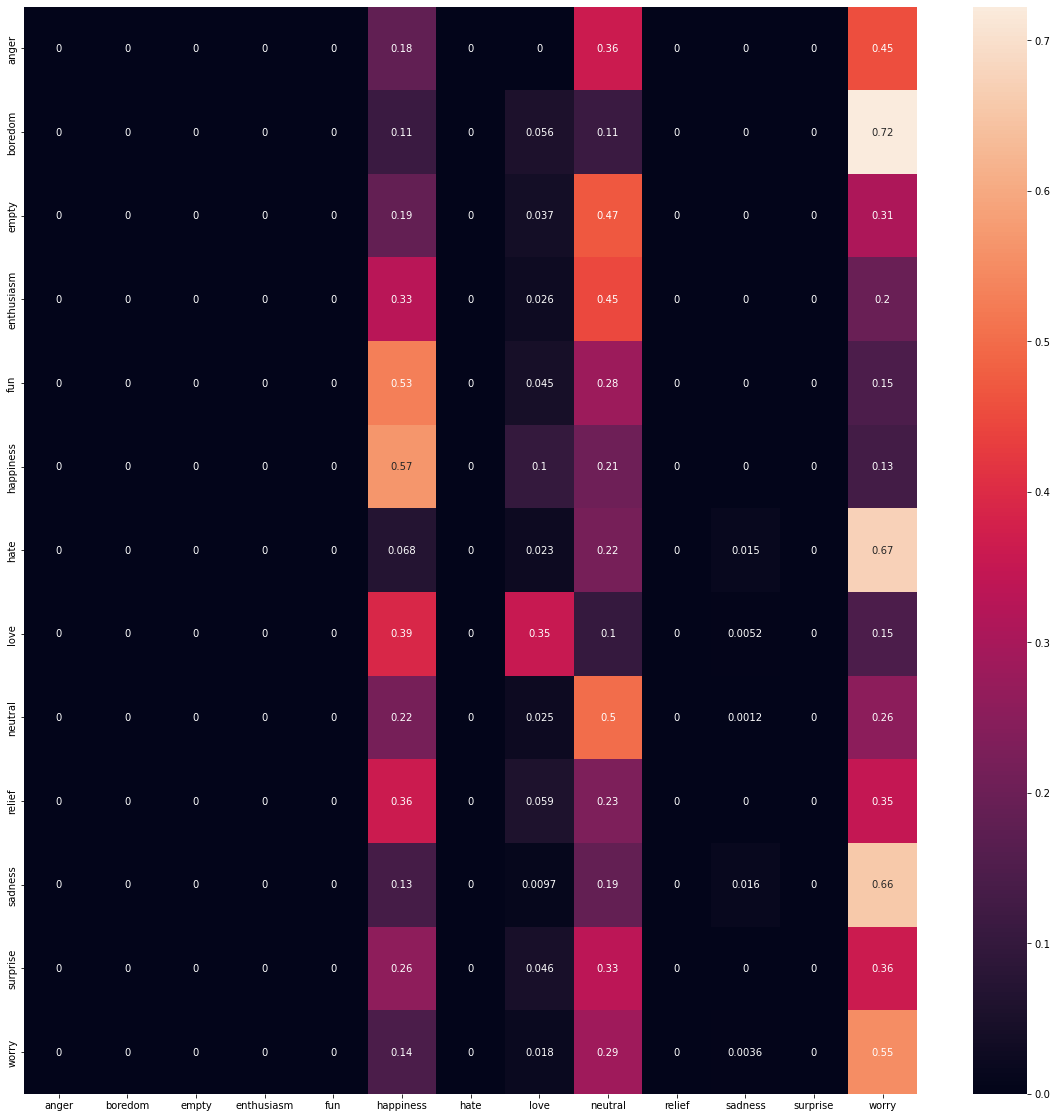

In [161]:
y_pred = np.argmax(y_hat, axis=1)
y_real = np.argmax(y_val, axis=1)
print_score(y_pred, y_real, label_encoder)

In [162]:
# !pip install transformers
!pip install sentencepiece

In [163]:
sentences = df["content"]
labels = df["sentiment"]

In [164]:
label_encoder = get_label_encoder_obj(labels)
labels = get_y_label_encoder(label_encoder, labels)

In [80]:
# from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=num_classes)

https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to C:\Users\h.d\.cache\huggingface\transformers\tmpw39yen_o


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt in cache at C:\Users\h.d/.cache\huggingface\transformers\45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for C:\Users\h.d/.cache\huggingface\transformers\45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to C:\Users\h.d\.cache\huggingface\transformers\tmpr6gnfh_o


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json in cache at C:\Users\h.d/.cache\huggingface\transformers\c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for C:\Users\h.d/.cache\huggingface\transformers\c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at C:\Users\h.d/.cache\huggingface\transformers\45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-u

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/config.json in cache at C:\Users\h.d/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
creating metadata file for C:\Users\h.d/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\h.d/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dro

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/tf_model.h5 in cache at C:\Users\h.d/.cache\huggingface\transformers\775efbdc2152093295bc5824dee96da82a5f3c1f218dfface1b8cef3094bdf8f.c719a806caef7d36ec0185f14b3b5fa727d919f924abe35622b4b7147bfbb8c7.h5
creating metadata file for C:\Users\h.d/.cache\huggingface\transformers\775efbdc2152093295bc5824dee96da82a5f3c1f218dfface1b8cef3094bdf8f.c719a806caef7d36ec0185f14b3b5fa727d919f924abe35622b4b7147bfbb8c7.h5
loading weights file https://huggingface.co/bert-base-uncased/resolve/main/tf_model.h5 from cache at C:\Users\h.d/.cache\huggingface\transformers\775efbdc2152093295bc5824dee96da82a5f3c1f218dfface1b8cef3094bdf8f.c719a806caef7d36ec0185f14b3b5fa727d919f924abe35622b4b7147bfbb8c7.h5
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You s

In [165]:
sent= sentences[0]

tokenized_sequence= bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =30,pad_to_max_length = True,truncation=True,
return_attention_mask = True)

tokenized_sequence

C:\Users\h.d\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2271: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'input_ids': [101, 2113, 4952, 2378, 2919, 10427, 3041, 2318, 11576, 2378, 2112, 1027, 1031, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [166]:
bert_tokenizer.decode(tokenized_sequence['input_ids'])

'[CLS] know listenin bad habit earlier started freakin part = [ [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [167]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

In [168]:
import pickle

pickle_inp_path='bert_inp.pkl'
pickle_mask_path='bert_mask.pkl'
pickle_label_path='bert_label.pkl'

pickle.dump((input_ids),open(pickle_inp_path,'wb'))
pickle.dump((attention_masks),open(pickle_mask_path,'wb'))
pickle.dump((labels),open(pickle_label_path,'wb'))


print('Pickle files saved as ',pickle_inp_path,pickle_mask_path,pickle_label_path)

Pickle files saved as  bert_inp.pkl bert_mask.pkl bert_label.pkl


In [169]:
print('Loading the saved pickle files..')

input_ids=pickle.load(open(pickle_inp_path, 'rb'))
attention_masks=pickle.load(open(pickle_mask_path, 'rb'))
labels=pickle.load(open(pickle_label_path, 'rb'))

print('Input shape {} Attention mask shape {} Input label shape {}'.format(input_ids.shape,attention_masks.shape,labels.shape))

Loading the saved pickle files..
Input shape (39841, 64) Attention mask shape (39841, 64) Input label shape (39841,)


In [170]:
from sklearn.model_selection import train_test_split

train_inp,val_inp,train_label,val_label,train_mask,val_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.2)

print('Train inp shape {} Val input shape {}\nTrain label shape {} Val label shape {}\nTrain attention mask shape {} Val attention mask shape {}'.format(train_inp.shape,val_inp.shape,train_label.shape,val_label.shape,train_mask.shape,val_mask.shape))

Train inp shape (31872, 64) Val input shape (7969, 64)
Train label shape (31872,) Val label shape (7969,)
Train attention mask shape (31872, 64) Val attention mask shape (7969, 64)


In [171]:
import tensorflow as tf
import keras

log_dir='tb_bert'
weights_dir = ""
model_save_path=os.path.join(weights_dir, 'bert_model.h5')

callbacks = [ModelCheckpoint(filepath=model_save_path,
                             save_weights_only=True,
                             monitor='val_loss',
                             mode='min',
                             verbose=1,
                             save_best_only=True), 
             EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5),
             keras.callbacks.TensorBoard(log_dir=log_dir)]

print('\nBert Model',bert_model.summary())

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

bert_model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  9997      
                                                                 
Total params: 109,492,237
Trainable params: 109,492,237
Non-trainable params: 0
_________________________________________________________________

Bert Model None


In [ ]:
start_time = time.time()

history=bert_model.fit([train_inp,train_mask],train_label,
                       batch_size=32,epochs=20,
                       validation_data=([val_inp,val_mask],val_label),
                       callbacks=callbacks)

duration = time.time() - start_time
print("Model take {} S to train ".format(duration))

Epoch 1/20
118/996 [==>...........................] - ETA: 7:48:44 - loss: 2.0733 - accuracy: 0.2948

In [ ]:
bert_model.load_weights("./bert_model.h5")


In [ ]:
y_hat = bert_model.predict([val_inp,val_mask])[0]
y_hat = np.argmax(y_hat, axis=1).flatten()
y_hat = y_hat.flatten()

In [ ]:
y_pred = np.argmax(y_hat, axis=1)
y_real = np.argmax(y_true, axis=1)
print_score(y_pred, y_real, label_encoder)